<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
US Publicly Traded Corporations' Bankruptcy Prediction</p><br>

A dataset for bankruptcy prediction related to American public companies listed on the New York Stock Exchange and NASDAQ is provided. The dataset comprises accounting data from 8,262 distinct companies recorded during the period spanning from 1999 to 2018.

According to the Security Exchange Commission (SEC), a company in the American market is deemed bankrupt under two circumstances. Firstly, if the firm's management files for Chapter 11 of the Bankruptcy Code, indicating an intention to "reorganize" its business. In this case, the company's management continues to oversee day-to-day operations, but significant business decisions necessitate approval from a bankruptcy court. Secondly, if the firm's management files for Chapter 7 of the Bankruptcy Code, indicating a complete cessation of operations and the company going out of business entirely.

In this dataset, the fiscal year prior to the filing of bankruptcy under either Chapter 11 or Chapter 7 is labeled as "Bankruptcy" (1) for the subsequent year. Conversely, if the company does not experience these bankruptcy events, it is considered to be operating normally (0). The dataset is complete, without any missing values, synthetic entries, or imputed added values. The variables (column heads) are coded as such: 

* X1	Current assets - All the assets of a company that are expected to be sold or used as a result of standard business operations over the next year
* X2	Cost of goods sold - The total amount a company paid as a cost directly related to the sale of products
* X3	Depreciation and amortization - Depreciation refers to the loss of value of a tangible fixed asset over time (such as property, machinery, buildings, and plant). Amortization refers to the loss of value of intangible assets over time.
* X4	EBITDA - Earnings before interest, taxes, depreciation, and amortization. It is a measure of a company's overall financial performance, serving as an alternative to net income.
* X5	Inventory - The accounting of items and raw materials that a company either uses in production or sells.
* X6	Net Income - The overall profitability of a company after all expenses and costs have been deducted from total revenue.
* X7	Total Receivables - The balance of money due to a firm for goods or services delivered or used but not yet paid for by customers.
* X8	Market value - The price of an asset in a marketplace. In this dataset, it refers to the market capitalization since companies are publicly traded in the stock market.
* X9	Net sales - The sum of a company's gross sales minus its returns, allowances, and discounts.
* X10	Total assets - All the assets, or items of value, a business owns.
* X11	Total Long-term debt - A company's loans and other liabilities that will not become due within one year of the balance sheet date.
* X12	EBIT - Earnings before interest and taxes.
* X13	Gross Profit - The profit a business makes after subtracting all the costs that are related to manufacturing and selling its products or services.
* X14	Total Current Liabilities - The sum of accounts payable, accrued liabilities, and taxes such as Bonds payable at the end of the year, salaries, and commissions remaining.
* X15	Retained Earnings - The amount of profit a company has left over after paying all its direct costs, indirect costs, income taxes, and its dividends to shareholders.
* X16	Total Revenue - The amount of income that a business has made from all sales before subtracting expenses. It may include interest and dividends from investments.
* X17	Total Liabilities - The combined debts and obligations that the company owes to outside parties.
* X18	Total Operating Expenses - The expenses a business incurs through its normal business operations.

I'm interested in seeing whether or not I could leverage this dataset to predict bankruptcy. Let's import the dataset using pandas and see what we're working with: 

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

df = pd.read_csv('american_bankruptcy.csv')

print(df.head())

  company_name status_label  year       X1       X2      X3      X4       X5  \
0          C_1        alive  1999  511.267  833.107  18.373  89.031  336.018   
1          C_1        alive  2000  485.856  713.811  18.577  64.367  320.590   
2          C_1        alive  2001  436.656  526.477  22.496  27.207  286.588   
3          C_1        alive  2002  396.412  496.747  27.172  30.745  259.954   
4          C_1        alive  2003  432.204  523.302  26.680  47.491  247.245   

       X6       X7  ...        X9      X10      X11     X12      X13      X14  \
0  35.163  128.348  ...  1024.333  740.998  180.447  70.658  191.226  163.816   
1  18.531  115.187  ...   874.255  701.854  179.987  45.790  160.444  125.392   
2 -58.939   77.528  ...   638.721  710.199  217.699   4.711  112.244  150.464   
3 -12.410   66.322  ...   606.337  686.621  164.658   3.573  109.590  203.575   
4   3.504  104.661  ...   651.958  709.292  248.666  20.811  128.656  131.261   

       X15       X16      X17   

I find it preferable to change the variable names from the X format to what they actually mean so let's do that:

In [37]:
# Create a dictionary to assign variable names to the old column headers
column_name_map = {
    'X1' : 'current_assets',
    'X2' : 'cost_of_goods_sold',
    'X3' : 'depreciation_amortization',
    'X4' : 'ebitda',
    'X5' : 'inventory', 
    'X6' : 'net_income',
    'X7' : 'total_receivables',
    'X8' : 'market_value',
    'X9' : 'net_sales',
    'X10' : 'total_assets',
    'X11' : 'total_long_term_debt',
    'X12' : 'ebit',
    'X13' : 'gross_profit', 
    'X14' : 'total_current_liabilities',
    'X15' : 'retained_earnings',
    'X16' : 'total_revenue',
    'X17' : 'total_liabilities',
    'X18' : 'total_operating_expenses'
}

# Rename Columns 
df.rename(columns=column_name_map, inplace=True)

# Check new data frame
print(df.head(10))

  company_name status_label  year  current_assets  cost_of_goods_sold  \
0          C_1        alive  1999         511.267             833.107   
1          C_1        alive  2000         485.856             713.811   
2          C_1        alive  2001         436.656             526.477   
3          C_1        alive  2002         396.412             496.747   
4          C_1        alive  2003         432.204             523.302   
5          C_1        alive  2004         474.542             598.172   
6          C_1        alive  2005         624.454             704.081   
7          C_1        alive  2006         645.721             837.171   
8          C_1        alive  2007         783.431            1080.895   
9          C_1        alive  2008         851.312            1110.677   

   depreciation_amortization   ebitda  inventory  net_income  \
0                     18.373   89.031    336.018      35.163   
1                     18.577   64.367    320.590      18.531   
2   

Now that the table looks more understandable, let's check the status_label column to see if it can be converted into a dummy variable we can use in our analysis

In [38]:
# Check the values in status_label 
unique_values = df['status_label'].unique()
print("\nStatus Label is composed of these values: ", unique_values)

# Since there are only two values called 'alive' & 'failed' Let's change the column name to is_bankrupt and make it equal 1 if failed, and 0 if alive 
# Create dicitionary to assign values
mapping_dict = {
    'failed' : 1,
    'alive' : 0
}

# reassign values and rename column
df['status_label'] = df['status_label'].map(mapping_dict)
df.rename(columns = {'status_label': 'is_bankrupt'}, inplace=True)

# check reassigned data_frame
print(df.head(20))


Status Label is composed of these values:  ['alive' 'failed']
   company_name  is_bankrupt  year  current_assets  cost_of_goods_sold  \
0           C_1            0  1999         511.267             833.107   
1           C_1            0  2000         485.856             713.811   
2           C_1            0  2001         436.656             526.477   
3           C_1            0  2002         396.412             496.747   
4           C_1            0  2003         432.204             523.302   
5           C_1            0  2004         474.542             598.172   
6           C_1            0  2005         624.454             704.081   
7           C_1            0  2006         645.721             837.171   
8           C_1            0  2007         783.431            1080.895   
9           C_1            0  2008         851.312            1110.677   
10          C_1            0  2009         863.429            1065.902   
11          C_1            0  2010         913.98

Before we start our analysis let's further clean our data by: 
* removing rows with missing company_name or year
* impute missing numerical values based on the numbers for each individual company 
* check for year values that aren't consistent with our range of 1999 to 2018

In [39]:
# drop rows with no company name or year 
df = df.dropna(subset=['company_name', 'year'])

# make sure year is a number
df['year'] = df['year'].astype(int)

# remove data with invalid years (outside of range)
valid_years = list(range(1999, 2019))
df = df[df['year'].isin(valid_years)]

# Convert years into years since 1999
df['years_since_1999'] = df['year'] - 1999

#impute missing data using linear regression for each specific company
exogenous_variables = ['current_assets', 'cost_of_goods_sold', 'depreciation_amortization', 'ebitda', 'inventory', 'net_income', 'total_receivables', 'market_value', 'net_sales', 'total_assets', 'total_long_term_debt', 'ebit', 'gross_profit', 'total_current_liabilities', 'retained_earnings', 'total_revenue', 'total_liabilities', 'total_operating_expenses']


for company, group in df.groupby('company_name'):
    df.loc[group.index, exogenous_variables] = group[exogenous_variables].interpolate(method='linear')


#check for remaining missing values
print("Remaining missing values after interpolation: ")
print(df[exogenous_variables].isnull().sum())

#final data frame
print(df.head(20))

Remaining missing values after interpolation: 
current_assets               0
cost_of_goods_sold           0
depreciation_amortization    0
ebitda                       0
inventory                    0
net_income                   0
total_receivables            0
market_value                 0
net_sales                    0
total_assets                 0
total_long_term_debt         0
ebit                         0
gross_profit                 0
total_current_liabilities    0
retained_earnings            0
total_revenue                0
total_liabilities            0
total_operating_expenses     0
dtype: int64
   company_name  is_bankrupt  year  current_assets  cost_of_goods_sold  \
0           C_1            0  1999         511.267             833.107   
1           C_1            0  2000         485.856             713.811   
2           C_1            0  2001         436.656             526.477   
3           C_1            0  2002         396.412             496.747   
4           

Now that we checked for missing values, let's do a summary and description for our data

In [40]:
df.describe()

,is_bankrupt,year,current_assets,cost_of_goods_sold,depreciation_amortization,ebitda,inventory,net_income,total_receivables,market_value,...,total_assets,total_long_term_debt,ebit,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses,years_since_1999
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,...,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,0.066343,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,...,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307,8.506317
std,0.248882,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,...,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038,5.742768
min,0.000000,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,...,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000,0.000000
25%,0.000000,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,...,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500,3.000000
50%,0.000000,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,...,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000,8.000000
75%,0.000000,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,...,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250,13.000000
max,1.000000,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,...,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000,19.000000


Let's check for collinearity with a correlation matrix visualization

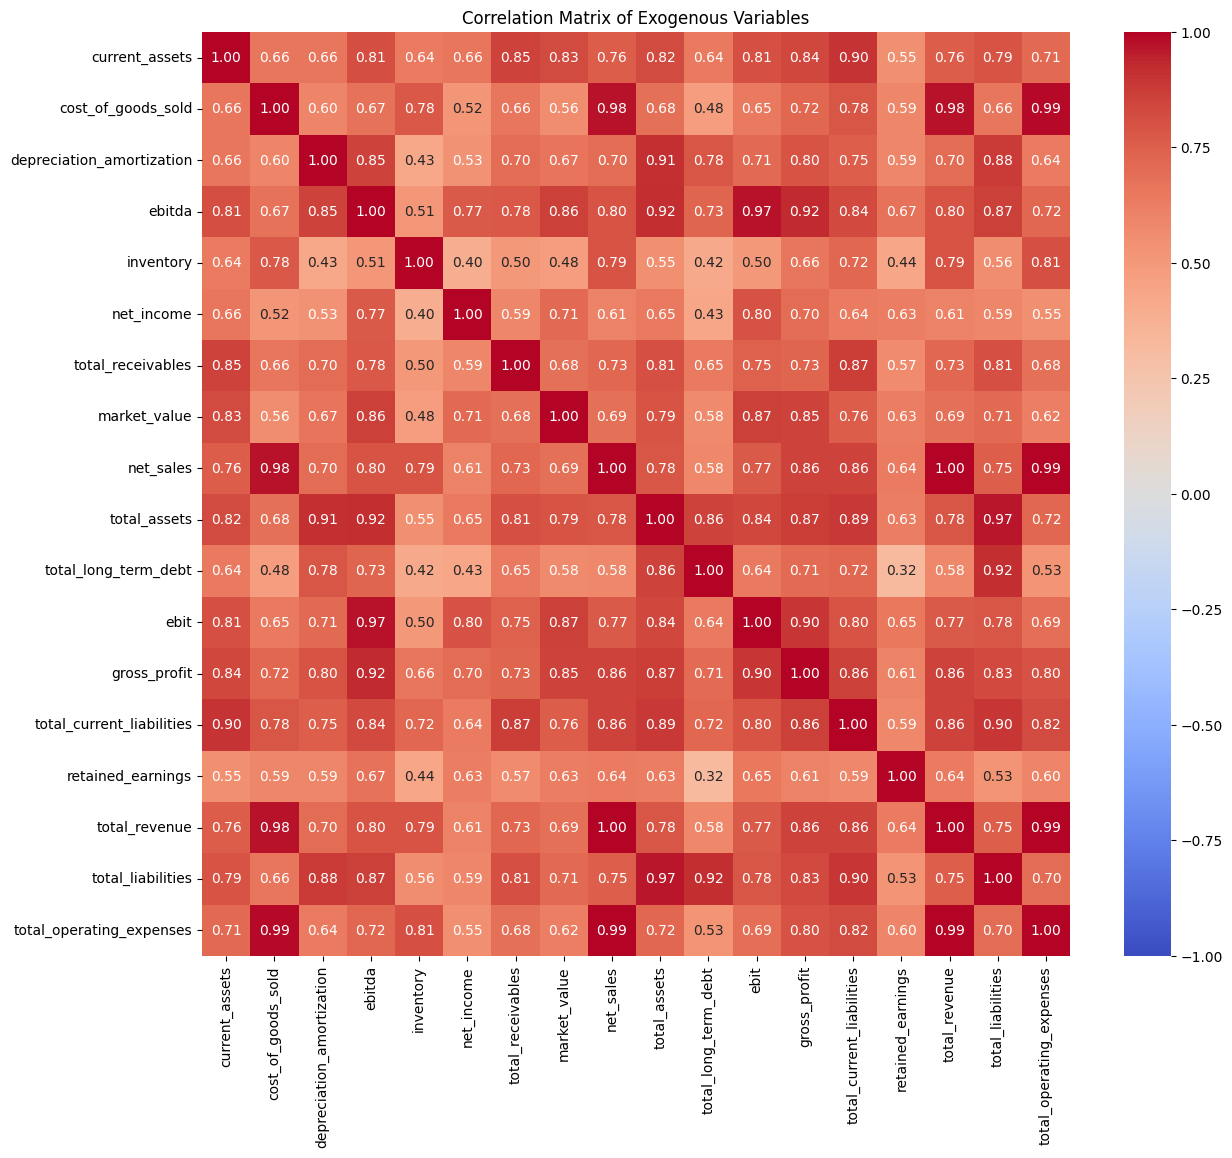

In [41]:
subset_data = df[exogenous_variables]
correlation_matrix = subset_data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Exogenous Variables")
plt.show()

Looking at the plot we could spot a lot of cases of strong collinearity which was expected given these financial metrics are related. So let's use the VIF Variance Inflation Factor to eliminate these cases before moving on to running a statistical model

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Function to calculate VIF and drop highly collinear variables
def calculate_vif(df, threshold=5.0):
    variables = df.columns
    dropped = True

    while dropped:
        dropped = False
        vif = pd.DataFrame()
        vif["VIF"] = [variance_inflation_factor(df[variables].values, i) for i in range(df[variables].shape[1])]
        vif["variable"] = variables

        # Find variables with the highest VIF
        max_vif = vif.loc[vif['VIF'].idxmax()]

        # Drop the variable if the VIF is above the threshold
        if max_vif['VIF'] > threshold:
            print(f"Dropping {max_vif['variable']} with VIF of {max_vif['VIF']}")
            variables = variables.drop(max_vif['variable'])
            dropped = True

    return df[variables]

# Calculate VIF and create a new DataFrame with reduced collinearity
X = subset_data.copy()  # Copy of the exogenous variables DataFrame
X = add_constant(X)     # Add constant to the model
reduced_X = calculate_vif(X)

# Drop the constant column added earlier
reduced_X = reduced_X.drop(columns=['const'])

# Display the remaining variables
print("Remaining variables after eliminating multicollinearity:")
print(reduced_X.columns)

c:\Users\Yacin Montassar\Desktop\bankruptcy_data\bankruptcy_data\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



Dropping net_sales with VIF of inf
Dropping total_revenue with VIF of 1286742750677284.5
Dropping total_operating_expenses with VIF of 33173977234.105762
Dropping ebitda with VIF of 3766593954.8240323
Dropping total_liabilities with VIF of 79.06252674352046
Dropping total_assets with VIF of 27.63239231438819
Dropping total_current_liabilities with VIF of 13.817524316972657
Dropping gross_profit with VIF of 12.197166278429394
Dropping current_assets with VIF of 8.313657783201286
Dropping ebit with VIF of 7.216651918467986
Remaining variables after eliminating multicollinearity:
Index(['cost_of_goods_sold', 'depreciation_amortization', 'inventory',
       'net_income', 'total_receivables', 'market_value',
       'total_long_term_debt', 'retained_earnings'],
      dtype='object')


Most of our columns have been removed to fix our collinearity issue. Since we have different numerical exogenous variables observed throughout time on the same time span for different companies, we could try to use random forest to make predictions while using the years_since_1999 & company_name variables as categorical variables

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Prepare the data
reduced_data = reduced_X.copy()
reduced_data['is_bankrupt'] = df['is_bankrupt']
reduced_data['company_name'] = df['company_name']
reduced_data['years_since_1999'] = df['years_since_1999']

# Encode categorical variables (company_name and years_since_1999)
le_company = LabelEncoder()
le_year = LabelEncoder()

reduced_data['company_name_encoded'] = le_company.fit_transform(reduced_data['company_name'])
reduced_data['years_since_1999_encoded'] = le_year.fit_transform(reduced_data['years_since_1999'])

# Define the features (X) and target (y)
features = reduced_data.drop(columns=['is_bankrupt', 'company_name', 'years_since_1999'])
target = reduced_data['is_bankrupt']

# Split the data into a training set and a test set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation: 5-fold Stratified on the training set
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation on the training set (accuracy score)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores and the mean accuracy
print("Cross-validation scores on the training set: ", cv_scores)
print("Mean cross-validation accuracy on the training set: ", np.mean(cv_scores))

# Train the Random Forest model on the training set
rf_model.fit(X_train, y_train)

# Predictions and model evaluation on the test set
predictions = rf_model.predict(X_test)

# Print the evaluation metrics on the test set
print("Classification Report on the test set:\n", classification_report(y_test, predictions))
print("Confusion Matrix on the test set:\n", confusion_matrix(y_test, predictions))
print("Accuracy on the test set: ", accuracy_score(y_test, predictions))

Cross-validation scores on the training set:  [0.93502264 0.93454603 0.9344666  0.93430773 0.93454603]
Mean cross-validation accuracy on the training set:  0.9345778060211296
Classification Report on the test set:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     14693
           1       0.93      0.02      0.05      1044

    accuracy                           0.94     15737
   macro avg       0.93      0.51      0.51     15737
weighted avg       0.93      0.94      0.91     15737

Confusion Matrix on the test set:
 [[14691     2]
 [ 1018    26]]
Accuracy on the test set:  0.9351845968100655


This result shows our model is performing well. The cross-validation scores have an average accuracy of 94%, so the model is stable and performing similarly across the different subsets. the F1 score for precision and recall confirms the model's effectiveness. The confusion matrix shows only one non bankrupt-company was falsely identified as bankrupt. Since the cross-validation scores are consistent and similar to the training accuracy, we shouldn't have a problem with overfitting here. But to make sure we have the test set which we ran our model on which gave us similar accuracy.

For the test set when looking at the confusion matrix, many false negatives (908 bankruptcies incorrectly classifed as non-bankruptcies whereas only 136 bankruptcies are correctly classifed). So even though the model has high overall accuracy, because it's so good at predicting non-bankruptcies, it has a poor performance in predicting bankruptcies which is shown by the low recall value. And this due to the sampling being heavily in favor of non bankruptcies.

Feature Importance:
                      Feature  Importance
8       company_name_encoded    0.145242
5               market_value    0.110756
7          retained_earnings    0.105954
1  depreciation_amortization    0.105623
0         cost_of_goods_sold    0.104945
3                 net_income    0.099556
4          total_receivables    0.097594
6       total_long_term_debt    0.089609
2                  inventory    0.086208
9   years_since_1999_encoded    0.054512


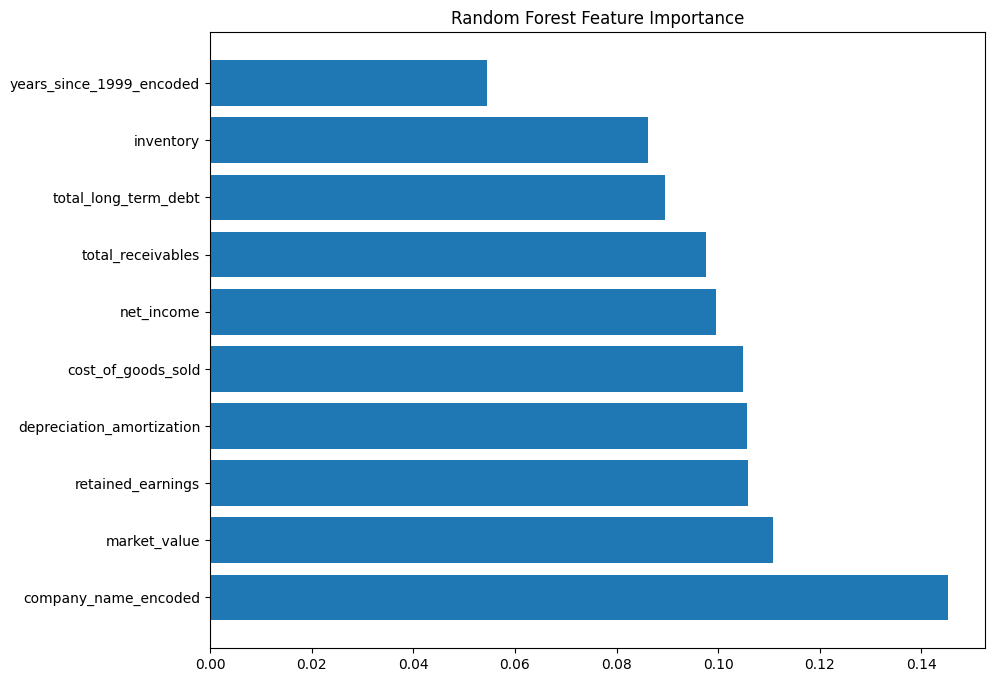

In [ ]:
# Feature importance
importances = rf_model.feature_importances_
feature_names = features.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance:\n", feature_importance_df)

# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title("Random Forest Feature Importance")
plt.show()

We can see that alongside out financial variables, the time and company specific effects together hold the most importance in the model